In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

(20, 201) (20, 201)
(20, 201) [[ 0.    1.    2.   ... 75.75 75.5  75.25]
 [ 0.    1.    2.   ... 75.75 75.5  75.25]
 [ 0.    1.    2.   ... 75.75 75.5  75.25]
 ...
 [ 0.    1.    2.   ... 75.75 75.5  75.25]
 [ 0.    1.    2.   ... 75.75 75.5  75.25]
 [ 0.    1.    2.   ... 75.75 75.5  75.25]]


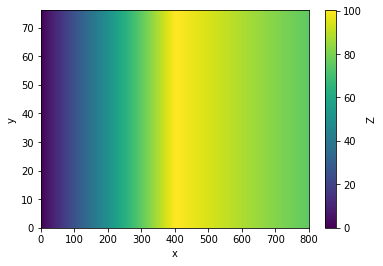

In [12]:
n_x, n_y = 201, 20
m = 1
step_horizontal = 4

x, y = np.arange(n_x)*step_horizontal, np.arange(n_y)*step_horizontal
X, Y = np.meshgrid(x, y)
# Z = np.array([[k*m]*n_x for k in range(n_y//2)] + \
#              [[n_y//2*m] * n_x] + \
#              [[n_y//2*m-k/4*m]*n_x for k in range(n_y//2)])
Z = np.array([[k*m for k in range(n_x//2)] + \
              [n_x//2*m] + \
              [n_x//2*m-k/4*m for k in range(n_x//2)] for l in range(n_y)])
# DANS Z : x croissant vers la droite ; y croissants vers le bas

print(X.shape, Y.shape)
print(Z.shape, Z)
clev = np.arange(Z.min()-0.1,Z.max()+0.1,.1)
plt.contourf(X, Y, Z, clev)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=Z.min()-0.1, vmax=Z.max()+0.1)), 
             label='Z')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# DANS LE PLOT : x croissant vers la droite ; y croissants vers le HAUT

In [16]:
gradient_y, gradient_x = np.gradient(Z)
gradient_y, gradient_x = gradient_y/step_horizontal, gradient_x/step_horizontal
# DANS LES GRADIENTS : x croissant vers la droite ; y croissants vers le bas
# coordonnée positive du gradient vers les x et y croissants

# print(gradient_y[:, 0], gradient_y[0, :])
# print(gradient_x[:, 0], gradient_x[0, :])

gradient_vect = np.transpose(np.vstack((gradient_x.flatten(), gradient_y.flatten())))
# gradient = np.vstack((gradient_x.flatten(), gradient_y.flatten()))
print(gradient_vect.shape, gradient_vect)

azimuth = -np.pi
direction = np.array([[np.cos(azimuth)], [np.sin(azimuth)]])
# azimuth for direction : positive where x and y are positive, negative where x>0 and y<0
print(direction.shape, direction)

slope = np.dot(gradient_vect, direction)
slope = slope.reshape(gradient_x.shape)
print(slope.shape, slope)
# DANS SLOPE : x croissant vers la droite ; y croissants vers le bas
# positif quand ça monte, négatif quand ça descend


(4020, 2) [[ 0.25    0.    ]
 [ 0.25    0.    ]
 [ 0.25    0.    ]
 ...
 [-0.0625  0.    ]
 [-0.0625  0.    ]
 [-0.0625  0.    ]]
(2, 1) [[-1.0000000e+00]
 [-1.2246468e-16]]
(20, 201) [[-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]
 [-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]
 [-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]
 ...
 [-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]
 [-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]
 [-0.25   -0.25   -0.25   ...  0.0625  0.0625  0.0625]]


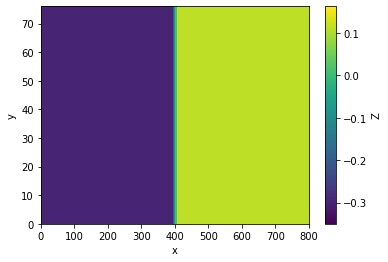

In [17]:
clev = np.arange(slope.min()-0.1,slope.max()+0.1,.1)
plt.contourf(X, Y, slope, clev)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=slope.min()-0.1, vmax=slope.max()+0.1)), 
             label='Z')
plt.xlabel('x')
plt.ylabel('y')
plt.show()